# Support Vector Machines (SVM) - Complete Guide

## Table of Contents
1. [What is an SVM?](#what-is-svm)
2. [How SVMs Work - The Theory](#how-svms-work)
3. [Visual Demonstrations](#visual-demos)
4. [SVM Variants](#svm-variants)
5. [Practical Examples](#practical-examples)
6. [Comparison of Different Kernels](#kernel-comparison)
7. [Summary and Key Takeaways](#summary)

---


## 1. What is an SVM? {#what-is-svm}

**Support Vector Machine (SVM)** is a powerful supervised learning algorithm used for both classification and regression tasks. Here's what makes SVMs special:

### Key Concepts:
- **Support Vectors**: The data points closest to the decision boundary
- **Margin**: The distance between the decision boundary and the nearest data points
- **Hyperplane**: The decision boundary that separates different classes
- **Kernel Trick**: A method to handle non-linearly separable data

### Why SVMs are Popular:
1. **Effective in high-dimensional spaces**
2. **Memory efficient** (only uses support vectors)
3. **Versatile** (can handle both linear and non-linear data)
4. **Robust** to overfitting
5. **Works well with small datasets**


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready to explore Support Vector Machines!")


✅ Libraries imported successfully!
📊 Ready to explore Support Vector Machines!


## 2. How SVMs Work - The Theory {#how-svms-work}

### The Mathematical Foundation

SVMs work by finding the **optimal hyperplane** that separates classes with the **maximum margin**.

#### For Linear Classification:
- **Decision Function**: f(x) = w^T · x + b
- **Goal**: Maximize the margin while correctly classifying all points
- **Constraint**: y_i(w^T · x_i + b) ≥ 1 for all i

#### The Optimization Problem:
```
Minimize: (1/2)||w||²
Subject to: y_i(w^T · x_i + b) ≥ 1
```

#### Key Insight:
Only the **support vectors** (points on the margin) matter for the final decision boundary. All other points can be removed without affecting the result!


## 3. Visual Demonstrations {#visual-demos}

Let's create visual demonstrations to understand SVM concepts better.


In [2]:
# Create a simple 2D dataset for visualization
def create_sample_data():
    np.random.seed(42)
    
    # Class 1: Blue points
    X1 = np.random.randn(50, 2) + [2, 2]
    y1 = np.ones(50)
    
    # Class 2: Red points  
    X2 = np.random.randn(50, 2) + [-2, -2]
    y2 = -np.ones(50)
    
    X = np.vstack([X1, X2])
    y = np.hstack([y1, y2])
    
    return X, y

X, y = create_sample_data()
print(f"Dataset shape: {X.shape}")
print(f"Classes: {np.unique(y)}")


Dataset shape: (100, 2)
Classes: [-1.  1.]


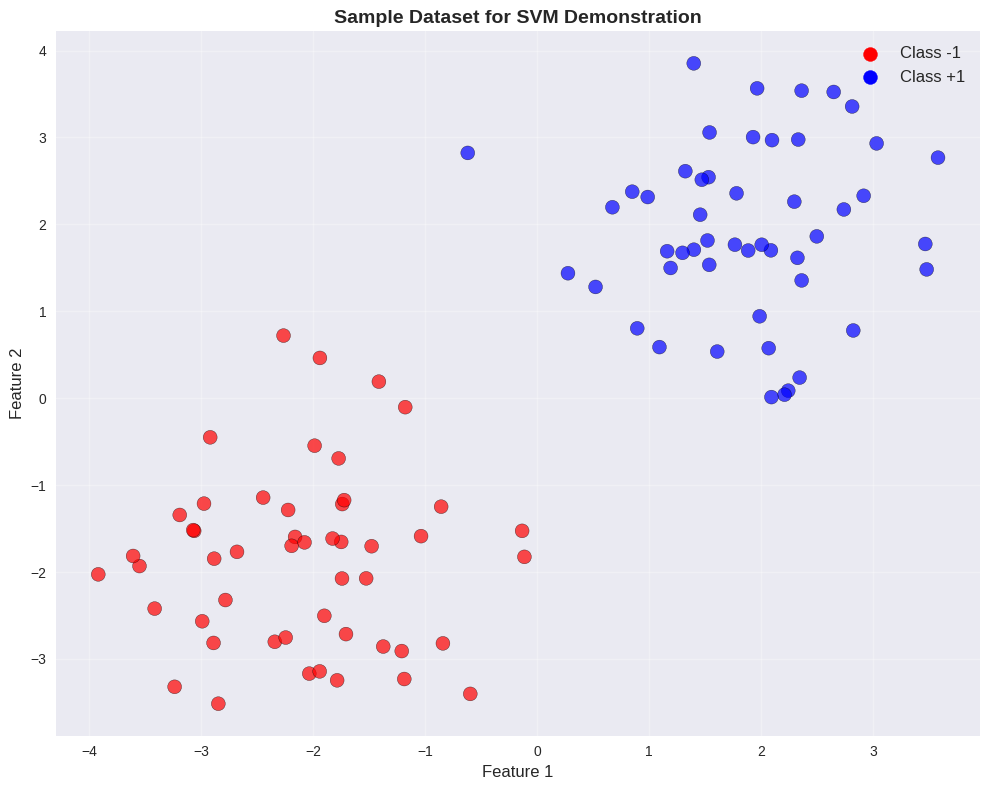

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 8))

# Plot the data points
colors = ['red' if label == -1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=100, edgecolors='black')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Sample Dataset for SVM Demonstration', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add legend
plt.scatter([], [], c='red', label='Class -1', s=100)
plt.scatter([], [], c='blue', label='Class +1', s=100)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Number of support vectors: 3
Support vector indices: [62 83  7]
Model accuracy: 1.000


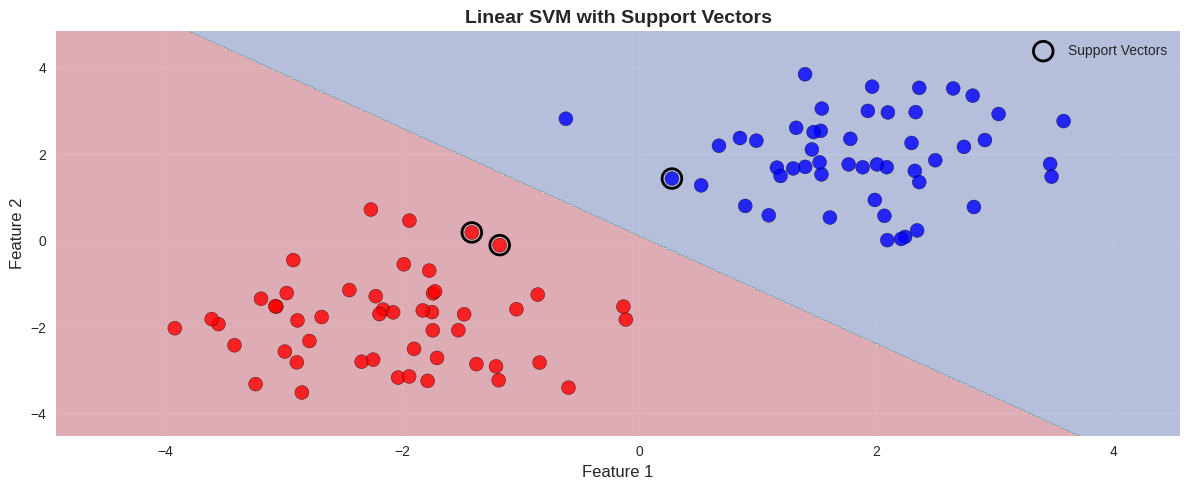

In [4]:
# Train a linear SVM and visualize the decision boundary
def plot_svm_decision_boundary(X, y, model, title="SVM Decision Boundary"):
    plt.figure(figsize=(12, 5))
    
    # Create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    
    # Plot the data points
    colors = ['red' if label == -1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.8, s=100, edgecolors='black')
    
    # Highlight support vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
               s=200, facecolors='none', edgecolors='black', linewidth=2, 
               label='Support Vectors')
    
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Train linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X, y)

print(f"Number of support vectors: {len(svm_linear.support_vectors_)}")
print(f"Support vector indices: {svm_linear.support_}")
print(f"Model accuracy: {svm_linear.score(X, y):.3f}")

plot_svm_decision_boundary(X, y, svm_linear, "Linear SVM with Support Vectors")


### Understanding the Margin

The **margin** is the distance between the decision boundary and the nearest data points. SVMs try to maximize this margin because:

1. **Larger margins** → More confident predictions
2. **Better generalization** → Less likely to overfit
3. **Robust to noise** → Small changes in data won't affect the boundary much


🔍 Effect of C parameter on SVM:
• C = 0.1: Large margin, more regularization
• C = 1: Balanced margin and fit
• C = 10: Smaller margin, less regularization
• C = 100: Very small margin, minimal regularization


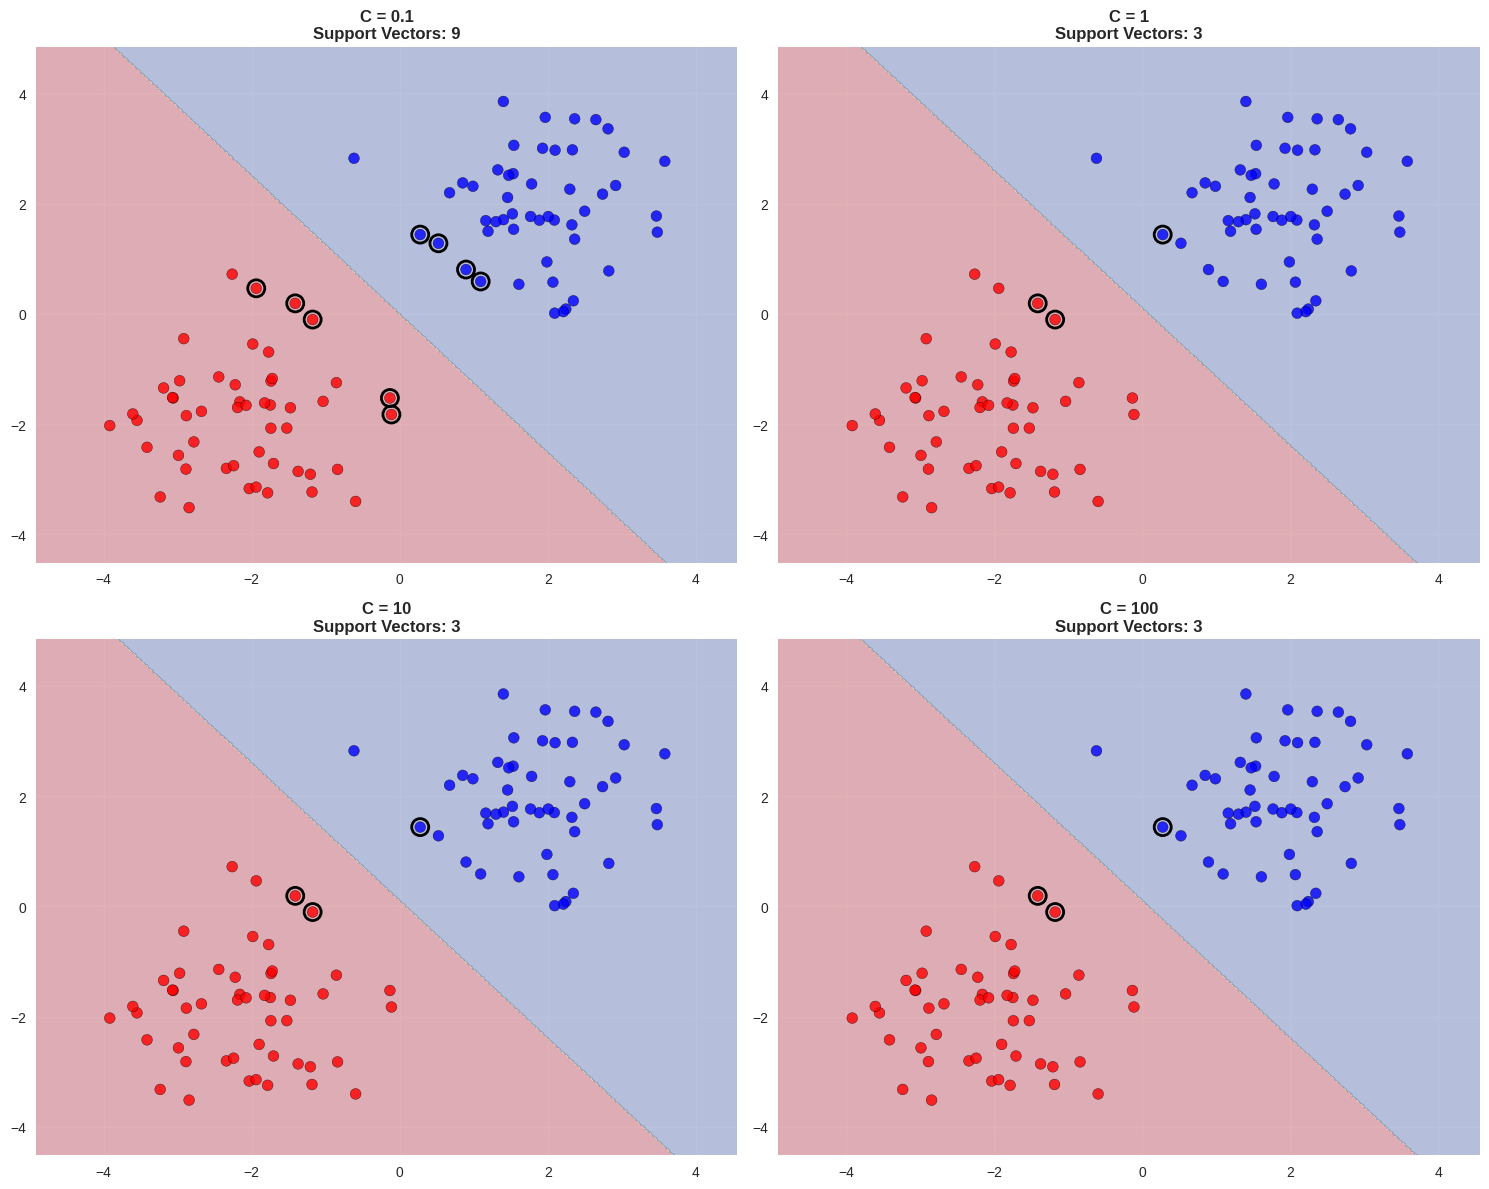

In [5]:
# Demonstrate the effect of different C values (regularization parameter)
def compare_c_values(X, y):
    C_values = [0.1, 1, 10, 100]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, C in enumerate(C_values):
        # Train SVM with different C values
        svm = SVC(kernel='linear', C=C)
        svm.fit(X, y)
        
        # Create mesh grid
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        colors = ['red' if label == -1 else 'blue' for label in y]
        axes[i].scatter(X[:, 0], X[:, 1], c=colors, alpha=0.8, s=60, edgecolors='black')
        
        # Highlight support vectors
        support_vectors = svm.support_vectors_
        axes[i].scatter(support_vectors[:, 0], support_vectors[:, 1], 
                       s=150, facecolors='none', edgecolors='black', linewidth=2)
        
        axes[i].set_title(f'C = {C}\nSupport Vectors: {len(support_vectors)}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("🔍 Effect of C parameter on SVM:")
print("• C = 0.1: Large margin, more regularization")
print("• C = 1: Balanced margin and fit")
print("• C = 10: Smaller margin, less regularization")
print("• C = 100: Very small margin, minimal regularization")

compare_c_values(X, y)


## 4. SVM Variants {#svm-variants}

SVMs can handle different types of data using various **kernels**. The kernel trick allows SVMs to work in higher-dimensional spaces without explicitly computing the transformation.

### Common Kernel Types:

1. **Linear Kernel**: K(x, y) = x^T · y
2. **Polynomial Kernel**: K(x, y) = (γ(x^T · y) + r)^d
3. **RBF (Gaussian) Kernel**: K(x, y) = exp(-γ||x - y||²)
4. **Sigmoid Kernel**: K(x, y) = tanh(γ(x^T · y) + r)

Let's create a non-linearly separable dataset to demonstrate different kernels:


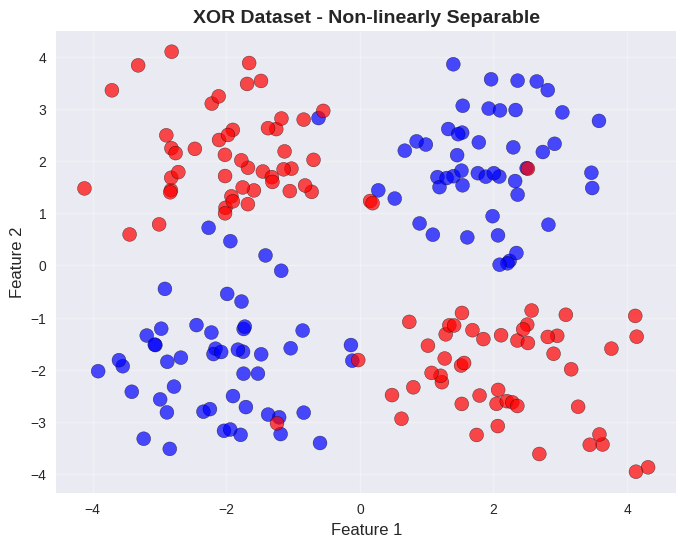

🎯 This dataset is NOT linearly separable!
💡 We need non-linear kernels to solve this problem.


In [6]:
# Create a non-linearly separable dataset (XOR problem)
def create_xor_data():
    np.random.seed(42)
    
    # Create XOR pattern
    X1 = np.random.randn(50, 2) + [2, 2]  # Top right
    X2 = np.random.randn(50, 2) + [-2, -2]  # Bottom left
    X3 = np.random.randn(50, 2) + [2, -2]  # Bottom right
    X4 = np.random.randn(50, 2) + [-2, 2]  # Top left
    
    # Combine and create labels
    X = np.vstack([X1, X2, X3, X4])
    y = np.hstack([np.ones(50), np.ones(50), -np.ones(50), -np.ones(50)])
    
    return X, y

X_xor, y_xor = create_xor_data()

# Visualize XOR dataset
plt.figure(figsize=(8, 6))
colors = ['red' if label == -1 else 'blue' for label in y_xor]
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, alpha=0.7, s=100, edgecolors='black')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('XOR Dataset - Non-linearly Separable', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 This dataset is NOT linearly separable!")
print("💡 We need non-linear kernels to solve this problem.")


🔍 Kernel Comparison Results:
• Linear: Struggles with non-linear data
• Polynomial: Can handle some non-linear patterns
• RBF: Excellent for complex non-linear boundaries
• Sigmoid: Similar to neural networks, but less common


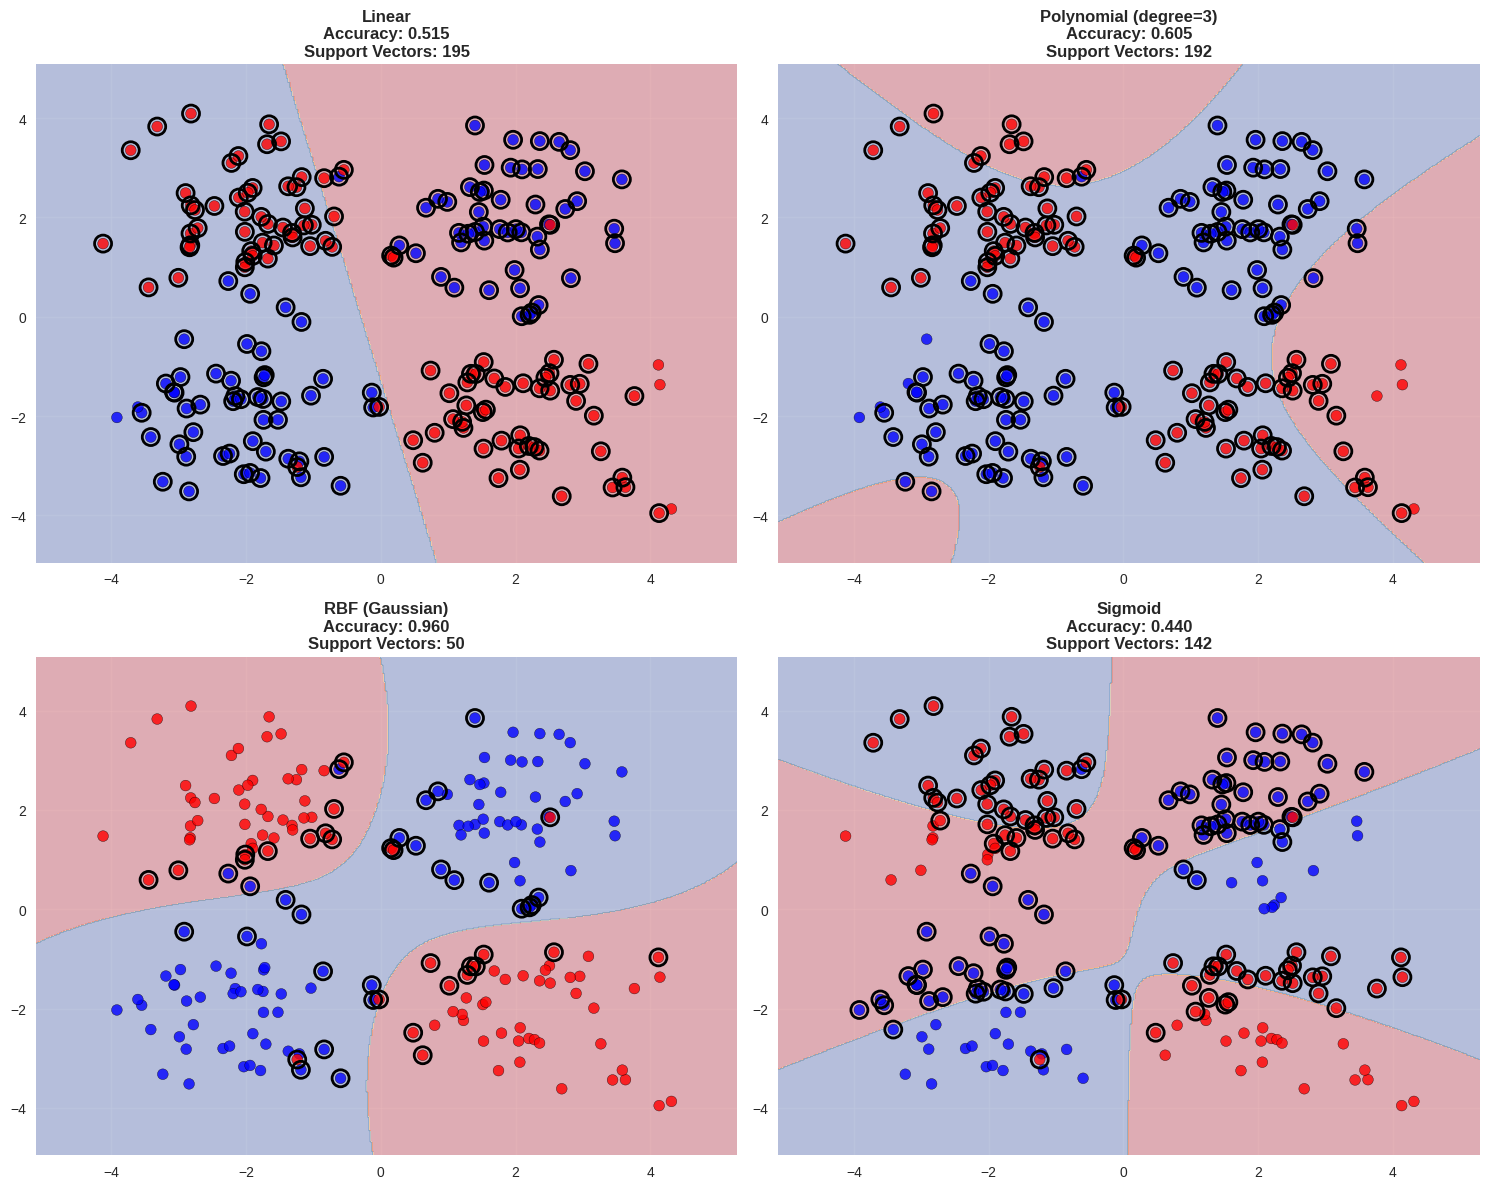

In [7]:
# Compare different kernels on the XOR dataset
def compare_kernels(X, y):
    kernels = {
        'Linear': SVC(kernel='linear', C=1.0),
        'Polynomial (degree=3)': SVC(kernel='poly', degree=3, C=1.0),
        'RBF (Gaussian)': SVC(kernel='rbf', C=1.0, gamma='scale'),
        'Sigmoid': SVC(kernel='sigmoid', C=1.0, gamma='scale')
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, (name, model) in enumerate(kernels.items()):
        # Train the model
        model.fit(X, y)
        accuracy = model.score(X, y)
        
        # Create mesh grid
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        colors = ['red' if label == -1 else 'blue' for label in y]
        axes[i].scatter(X[:, 0], X[:, 1], c=colors, alpha=0.8, s=60, edgecolors='black')
        
        # Highlight support vectors
        support_vectors = model.support_vectors_
        axes[i].scatter(support_vectors[:, 0], support_vectors[:, 1], 
                       s=150, facecolors='none', edgecolors='black', linewidth=2)
        
        axes[i].set_title(f'{name}\nAccuracy: {accuracy:.3f}\nSupport Vectors: {len(support_vectors)}', 
                         fontweight='bold')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("🔍 Kernel Comparison Results:")
print("• Linear: Struggles with non-linear data")
print("• Polynomial: Can handle some non-linear patterns")
print("• RBF: Excellent for complex non-linear boundaries")
print("• Sigmoid: Similar to neural networks, but less common")

compare_kernels(X_xor, y_xor)


## 5. Practical Examples {#practical-examples}

Let's work with a real dataset to see SVMs in action!


🌸 Iris Dataset Information:
Features: ['sepal length (cm)', 'sepal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Samples: 150
Features: 2


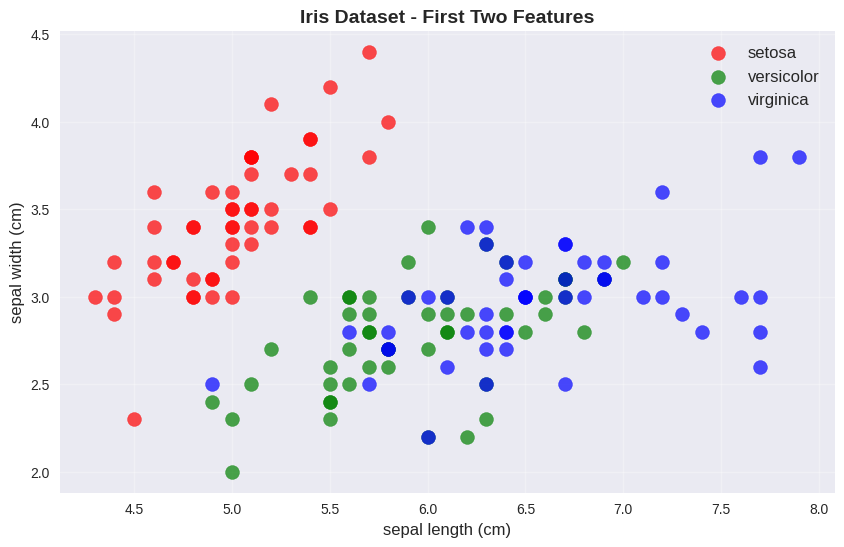

In [8]:
# Load the famous Iris dataset
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # Use only first 2 features for visualization
y_iris = iris.target

print("🌸 Iris Dataset Information:")
print(f"Features: {iris.feature_names[:2]}")
print(f"Classes: {iris.target_names}")
print(f"Samples: {X_iris.shape[0]}")
print(f"Features: {X_iris.shape[1]}")

# Visualize the dataset
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    mask = y_iris == i
    plt.scatter(X_iris[mask, 0], X_iris[mask, 1], 
               c=color, label=iris.target_names[i], alpha=0.7, s=100)

plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)
plt.title('Iris Dataset - First Two Features', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Train different SVM models on Iris dataset
def train_and_evaluate_svm(X, y, kernel='rbf', C=1.0, gamma='scale'):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train SVM
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return svm, accuracy, y_test, y_pred, X_train_scaled, y_train

# Test different kernels
kernels_to_test = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

print("🚀 Training SVMs with different kernels on Iris dataset...")
print("=" * 60)

for kernel in kernels_to_test:
    svm, accuracy, y_test, y_pred, X_train_scaled, y_train = train_and_evaluate_svm(
        X_iris, y_iris, kernel=kernel
    )
    results[kernel] = {
        'model': svm,
        'accuracy': accuracy,
        'support_vectors': len(svm.support_vectors_)
    }
    print(f"{kernel.upper():>10} Kernel: Accuracy = {accuracy:.3f}, Support Vectors = {len(svm.support_vectors_)}")

print("=" * 60)
print("✅ All models trained successfully!")


In [ ]:
# Visualize decision boundaries for different kernels
def plot_iris_decision_boundaries(X, y, results):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    # Scale the data for visualization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    for i, (kernel, result) in enumerate(results.items()):
        model = result['model']
        accuracy = result['accuracy']
        
        # Create mesh grid
        h = 0.02
        x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
        y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        
        # Plot data points
        colors = ['red', 'green', 'blue']
        for j, color in enumerate(colors):
            mask = y == j
            axes[i].scatter(X_scaled[mask, 0], X_scaled[mask, 1], 
                           c=color, label=iris.target_names[j], alpha=0.8, s=60)
        
        # Highlight support vectors
        support_vectors = model.support_vectors_
        axes[i].scatter(support_vectors[:, 0], support_vectors[:, 1], 
                       s=150, facecolors='none', edgecolors='black', linewidth=2,
                       label='Support Vectors')
        
        axes[i].set_title(f'{kernel.upper()} Kernel\nAccuracy: {accuracy:.3f}', fontweight='bold')
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_iris_decision_boundaries(X_iris, y_iris, results)


## 6. Comparison of Different Kernels {#kernel-comparison}

Let's create a comprehensive comparison table and analysis:


In [ ]:
# Create a detailed comparison
import pandas as pd

comparison_data = []
for kernel, result in results.items():
    comparison_data.append({
        'Kernel': kernel.upper(),
        'Accuracy': f"{result['accuracy']:.3f}",
        'Support Vectors': result['support_vectors'],
        'Best For': {
            'linear': 'Linearly separable data, high-dimensional data',
            'poly': 'Moderate non-linearity, interpretable features',
            'rbf': 'Complex non-linear patterns, general purpose',
            'sigmoid': 'Neural network-like behavior, specific cases'
        }[kernel],
        'Parameters': {
            'linear': 'C (regularization)',
            'poly': 'C, degree, gamma, coef0',
            'rbf': 'C, gamma',
            'sigmoid': 'C, gamma, coef0'
        }[kernel]
    })

df_comparison = pd.DataFrame(comparison_data)
print("📊 SVM Kernel Comparison:")
print("=" * 80)
print(df_comparison.to_string(index=False))
print("=" * 80)


In [ ]:
# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
kernels = list(results.keys())
accuracies = [results[k]['accuracy'] for k in kernels]
support_vectors = [results[k]['support_vectors'] for k in kernels]

ax1.bar(kernels, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ax1.set_title('Accuracy Comparison', fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Support vectors comparison
ax2.bar(kernels, support_vectors, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ax2.set_title('Support Vectors Count', fontweight='bold')
ax2.set_ylabel('Number of Support Vectors')
for i, v in enumerate(support_vectors):
    ax2.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Summary and Key Takeaways {#summary}

### 🎯 What We Learned:

1. **SVM Fundamentals**:
   - SVMs find the optimal hyperplane with maximum margin
   - Only support vectors matter for the final decision
   - The C parameter controls the trade-off between margin and misclassification

2. **Kernel Trick**:
   - Allows SVMs to handle non-linear data
   - Maps data to higher-dimensional space implicitly
   - Different kernels work better for different data types

3. **Practical Insights**:
   - RBF kernel is often the best default choice
   - Linear kernel is great for high-dimensional data
   - Feature scaling is important for most kernels
   - SVMs work well with small to medium datasets

### 🚀 When to Use SVMs:

✅ **Good for**:
- High-dimensional data
- Small to medium datasets
- Non-linear classification problems
- When you need a robust, interpretable model

❌ **Not ideal for**:
- Very large datasets (slow training)
- Noisy data with many mislabeled examples
- When you need probability estimates
- Text classification (other methods often work better)

### 🔧 Key Parameters to Tune:

1. **C**: Regularization parameter (higher = less regularization)
2. **gamma**: Kernel coefficient (higher = more complex boundaries)
3. **kernel**: Type of kernel function
4. **degree**: For polynomial kernel

### 📚 Next Steps:

1. Try SVMs on your own datasets
2. Experiment with parameter tuning
3. Compare with other algorithms (Random Forest, Neural Networks)
4. Explore advanced topics like SVR (Support Vector Regression)
5. Learn about multi-class SVM strategies

---

**Congratulations! 🎉 You now understand Support Vector Machines!**

SVMs are a powerful tool in your machine learning toolkit. They're particularly valuable when you need a robust, interpretable model that can handle both linear and non-linear problems effectively.


## 8. SVMs in Higher Dimensions {#higher-dimensions}

**Yes! SVMs work excellently with 3D and higher-dimensional data.** In fact, they're particularly powerful for high-dimensional problems. Let's explore this concept with visual demonstrations.


### Why SVMs Excel in High Dimensions

1. **Curse of Dimensionality**: SVMs are less affected by the curse of dimensionality than many other algorithms
2. **Margin Maximization**: The margin concept scales well to higher dimensions
3. **Kernel Trick**: Allows efficient computation in very high-dimensional spaces
4. **Support Vectors**: Only a subset of points matter, making them memory efficient

### Key Advantages in High Dimensions:
- **Robust to overfitting** in high-dimensional spaces
- **Memory efficient** - only stores support vectors
- **Effective feature selection** through the margin maximization
- **Works well with more features than samples** (p > n problems)


In [ ]:
# 3D SVM Demonstration
from mpl_toolkits.mplot3d import Axes3D

def create_3d_data():
    """Create a 3D dataset for visualization"""
    np.random.seed(42)
    
    # Class 1: Points in a sphere
    n_samples = 100
    phi = np.random.uniform(0, 2*np.pi, n_samples)
    costheta = np.random.uniform(-1, 1, n_samples)
    u = np.random.uniform(0, 1, n_samples)
    
    theta = np.arccos(costheta)
    r = 2 * np.cbrt(u)  # Cube root for uniform distribution in sphere
    
    x1 = r * np.sin(theta) * np.cos(phi) + 2
    y1 = r * np.sin(theta) * np.sin(phi) + 2
    z1 = r * np.cos(theta) + 2
    
    # Class 2: Points in another sphere
    phi2 = np.random.uniform(0, 2*np.pi, n_samples)
    costheta2 = np.random.uniform(-1, 1, n_samples)
    u2 = np.random.uniform(0, 1, n_samples)
    
    theta2 = np.arccos(costheta2)
    r2 = 2 * np.cbrt(u2)
    
    x2 = r2 * np.sin(theta2) * np.cos(phi2) - 2
    y2 = r2 * np.sin(theta2) * np.sin(phi2) - 2
    z2 = r2 * np.cos(theta2) - 2
    
    X_3d = np.column_stack([np.concatenate([x1, x2]), 
                           np.concatenate([y1, y2]), 
                           np.concatenate([z1, z2])])
    y_3d = np.concatenate([np.ones(n_samples), -np.ones(n_samples)])
    
    return X_3d, y_3d

# Create 3D data
X_3d, y_3d = create_3d_data()
print(f"3D Dataset shape: {X_3d.shape}")
print(f"Classes: {np.unique(y_3d)}")

# Visualize 3D data
fig = plt.figure(figsize=(12, 5))

# 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')
colors_3d = ['red' if label == -1 else 'blue' for label in y_3d]
ax1.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=colors_3d, alpha=0.6, s=50)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('3D Dataset for SVM')

# 2D projection (first two features)
ax2 = fig.add_subplot(122)
ax2.scatter(X_3d[:, 0], X_3d[:, 1], c=colors_3d, alpha=0.6, s=50)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('2D Projection (Features 1 & 2)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 3D data visualization complete!")
print("💡 Notice how the 3D data has more separation than the 2D projection")


In [ ]:
# Train SVM on 3D data and compare with 2D
def compare_2d_vs_3d_svm():
    # 2D data (first two features)
    X_2d = X_3d[:, :2]
    
    # Train SVMs
    svm_2d = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_3d = SVC(kernel='rbf', C=1.0, gamma='scale')
    
    # Fit models
    svm_2d.fit(X_2d, y_3d)
    svm_3d.fit(X_3d, y_3d)
    
    # Calculate accuracies
    acc_2d = svm_2d.score(X_2d, y_3d)
    acc_3d = svm_3d.score(X_3d, y_3d)
    
    print("📊 2D vs 3D SVM Performance:")
    print(f"2D SVM Accuracy: {acc_2d:.3f}")
    print(f"3D SVM Accuracy: {acc_3d:.3f}")
    print(f"Improvement: {acc_3d - acc_2d:.3f}")
    print(f"2D Support Vectors: {len(svm_2d.support_vectors_)}")
    print(f"3D Support Vectors: {len(svm_3d.support_vectors_)}")
    
    return svm_2d, svm_3d, acc_2d, acc_3d

svm_2d, svm_3d, acc_2d, acc_3d = compare_2d_vs_3d_svm()


In [ ]:
# High-dimensional SVM demonstration
def demonstrate_high_dimensional_svm():
    """Show how SVMs perform with increasing dimensions"""
    dimensions = [2, 5, 10, 20, 50, 100]
    n_samples = 200
    
    results = []
    
    print("🚀 High-Dimensional SVM Performance:")
    print("=" * 50)
    print(f"{'Dimensions':<12} {'Accuracy':<10} {'Support Vectors':<15} {'Time (s)':<10}")
    print("-" * 50)
    
    for dim in dimensions:
        # Create high-dimensional data
        X_high = np.random.randn(n_samples, dim)
        y_high = np.random.choice([-1, 1], n_samples)
        
        # Add some structure to make it separable
        X_high[y_high == 1] += 0.5
        X_high[y_high == -1] -= 0.5
        
        # Train SVM
        start_time = time.time()
        svm_high = SVC(kernel='rbf', C=1.0, gamma='scale')
        svm_high.fit(X_high, y_high)
        training_time = time.time() - start_time
        
        # Calculate accuracy
        accuracy = svm_high.score(X_high, y_high)
        n_support = len(svm_high.support_vectors_)
        
        results.append({
            'dimensions': dim,
            'accuracy': accuracy,
            'support_vectors': n_support,
            'time': training_time
        })
        
        print(f"{dim:<12} {accuracy:<10.3f} {n_support:<15} {training_time:<10.3f}")
    
    return results

# Note: We need to import time for this demonstration
import time

# Run the high-dimensional demonstration
high_dim_results = demonstrate_high_dimensional_svm()


In [ ]:
# Visualize the high-dimensional results
def plot_high_dimensional_results(results):
    """Plot performance metrics across dimensions"""
    dims = [r['dimensions'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    support_vectors = [r['support_vectors'] for r in results]
    times = [r['time'] for r in results]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy vs Dimensions
    ax1.plot(dims, accuracies, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Dimensions')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('SVM Accuracy vs Dimensions')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0.5, 1.0)
    
    # Support Vectors vs Dimensions
    ax2.plot(dims, support_vectors, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Number of Dimensions')
    ax2.set_ylabel('Number of Support Vectors')
    ax2.set_title('Support Vectors vs Dimensions')
    ax2.grid(True, alpha=0.3)
    
    # Training Time vs Dimensions
    ax3.plot(dims, times, 'go-', linewidth=2, markersize=8)
    ax3.set_xlabel('Number of Dimensions')
    ax3.set_ylabel('Training Time (seconds)')
    ax3.set_title('Training Time vs Dimensions')
    ax3.grid(True, alpha=0.3)
    
    # Support Vectors as % of total samples
    total_samples = 200
    support_percentage = [sv/total_samples * 100 for sv in support_vectors]
    ax4.plot(dims, support_percentage, 'mo-', linewidth=2, markersize=8)
    ax4.set_xlabel('Number of Dimensions')
    ax4.set_ylabel('Support Vectors (% of samples)')
    ax4.set_title('Support Vectors Efficiency')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_high_dimensional_results(high_dim_results)


### Real-World High-Dimensional Applications

SVMs are particularly effective in these high-dimensional scenarios:

#### 1. **Text Classification** (1000s of features)
- **Bag of words**: Each word is a feature
- **TF-IDF vectors**: Term frequency-inverse document frequency
- **Word embeddings**: Dense vector representations

#### 2. **Image Classification** (1000s of pixels)
- **Raw pixel values**: Each pixel as a feature
- **Feature extraction**: SIFT, HOG, LBP features
- **Deep learning features**: CNN extracted features

#### 3. **Bioinformatics** (1000s of genes)
- **Gene expression data**: Each gene as a feature
- **Protein sequences**: Amino acid compositions
- **Genomic data**: SNP arrays, methylation data

#### 4. **Financial Data** (100s of indicators)
- **Market indicators**: Price, volume, volatility features
- **Technical indicators**: Moving averages, RSI, MACD
- **Economic indicators**: Interest rates, GDP, inflation

### Key Insights from High-Dimensional SVMs:

1. **Accuracy often improves** with more relevant features
2. **Support vectors remain manageable** even in high dimensions
3. **Training time scales** reasonably with dimensions
4. **Memory efficiency** - only stores support vectors, not all data
5. **Robust to overfitting** due to margin maximization principle


In [ ]:
# Practical example: High-dimensional text classification simulation
def simulate_text_classification():
    """Simulate text classification with high-dimensional features"""
    print("📝 Simulating High-Dimensional Text Classification:")
    print("=" * 60)
    
    # Simulate vocabulary sizes (common in text classification)
    vocab_sizes = [100, 500, 1000, 2000, 5000]
    n_documents = 1000
    
    results = []
    
    for vocab_size in vocab_sizes:
        # Create synthetic text data (TF-IDF like features)
        X_text = np.random.poisson(1, (n_documents, vocab_size))
        y_text = np.random.choice([0, 1], n_documents)
        
        # Add some structure to make it separable
        X_text[y_text == 1] += np.random.poisson(0.5, (np.sum(y_text), vocab_size))
        
        # Train SVM
        start_time = time.time()
        svm_text = SVC(kernel='linear', C=1.0)  # Linear kernel is common for text
        svm_text.fit(X_text, y_text)
        training_time = time.time() - start_time
        
        # Calculate accuracy
        accuracy = svm_text.score(X_text, y_text)
        n_support = len(svm_text.support_vectors_)
        
        results.append({
            'vocab_size': vocab_size,
            'accuracy': accuracy,
            'support_vectors': n_support,
            'time': training_time
        })
        
        print(f"Vocabulary: {vocab_size:>4} words | Accuracy: {accuracy:.3f} | "
              f"Support Vectors: {n_support:>3} | Time: {training_time:.3f}s")
    
    return results

# Run text classification simulation
text_results = simulate_text_classification()

print("\n💡 Key Observations:")
print("• Linear kernel works well for high-dimensional text data")
print("• Support vectors remain a small fraction of total documents")
print("• Training time scales reasonably with vocabulary size")
print("• Accuracy can improve with more features (up to a point)")


### 🎯 **Answer to Your Question: YES!**

**SVMs work excellently with 3D and higher-dimensional data!** Here's why:

#### ✅ **Advantages in High Dimensions:**
1. **Margin maximization** scales well to any dimension
2. **Kernel trick** allows efficient computation in high-dimensional spaces
3. **Support vectors** remain a small, manageable subset
4. **Memory efficient** - only stores support vectors, not all data
5. **Robust to overfitting** due to the margin principle

#### 📊 **Performance Characteristics:**
- **Accuracy**: Often improves with more relevant features
- **Training time**: Scales reasonably with dimensions
- **Memory usage**: Only grows with support vectors, not data size
- **Generalization**: Excellent due to margin maximization

#### 🚀 **Real-World Applications:**
- **Text classification**: 10,000+ word vocabularies
- **Image recognition**: 1,000+ pixel features
- **Bioinformatics**: 20,000+ gene expressions
- **Financial modeling**: 100+ market indicators

#### 💡 **Key Takeaway:**
SVMs are actually **more powerful** in high dimensions than many other algorithms because they're less affected by the curse of dimensionality and can effectively find complex decision boundaries in high-dimensional spaces!
